In [1]:
!pip install dataframe_image 

In [2]:
#Import Libraries
import pandas as pd
from datetime import datetime
import time
import numpy as np
import copy
import re
import dataframe_image as dfi
import seaborn as sns

# 1. Data Understanding

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('WorldIndicators-ForInterview.csv')
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,GDP per Capita,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Below Threshold,1.5-3%,Algeria,Low,$0,Africa,1/12/00,2.00%,NaN,"87,931",NaN,NaN,"26,998",$55B,"$1,727",3.50%,$60,NaN,0.034,1%,0.100,69.0,71.0,67.0,0%,1,0.342,0.619,0.039,31.7M,59.90%,$0B,$0B
1,Below Threshold,Above 3%,Angola,Low,$0,Africa,1/12/00,5.00%,NaN,"9,542",NaN,NaN,"7,499",$9B,$656,3.40%,$22,NaN,0.128,0%,1.032,46.0,47.0,44.0,0%,1,0.476,0.499,0.025,13.9M,32.40%,$0B,$0B
2,Below Threshold,Above 3%,Benin,Low,$0,Africa,1/12/00,4.30%,NaN,"1,617",NaN,NaN,"1,983",$2B,$339,4.30%,$15,NaN,0.090,0%,NaN,55.0,57.0,53.0,1%,1,0.454,0.517,0.029,6.9M,38.30%,$0B,$0B
3,Below Threshold,1.5-3%,Botswana,Friendly,$0,Africa,1/12/00,2.70%,NaN,"4,276",NaN,NaN,"1,836",$6B,"$3,297",4.70%,$152,NaN,0.054,3%,0.155,51.0,52.0,49.0,13%,1,0.383,0.587,0.029,1.8M,53.20%,$0B,$0B
4,Below Threshold,Above 3%,Burkina Faso,Low,$0,Africa,1/12/00,4.60%,NaN,"1,041",NaN,NaN,NaN,$3B,$225,5.10%,$12,NaN,0.096,0%,NaN,51.0,52.0,49.0,0%,1,0.468,0.505,0.028,11.6M,17.80%,$0B,$0B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Below Threshold,1.5-3%,Belize,Moderate,"$4,688",The Americas,1/12/12,2.40%,33%,NaN,44.0,104.0,NaN,$2B,"$4,852",5.80%,$259,147,0.015,25%,0.124,74.0,77.0,71.0,53%,1,0.344,0.617,0.039,0.3M,44.50%,$0B,$0B
2687,Below Threshold,1.5-3%,Haiti,Low,$0,The Americas,1/12/12,2.60%,40%,NaN,105.0,177.0,NaN,$8B,$776,6.40%,$53,184,0.056,10%,0.089,63.0,65.0,61.0,60%,1,0.354,0.601,0.045,10.2M,54.80%,$0B,$0B
2688,Below Threshold,1.5-3%,Bolivia,Low,$0,The Americas,1/12/12,2.60%,83%,NaN,49.0,158.0,NaN,$27B,"$2,576",5.80%,$149,"1,025",0.032,36%,0.111,67.0,69.0,65.0,90%,1,0.352,0.599,0.048,10.5M,67.30%,$1B,$1B
2689,Below Threshold,1.5-3%,Honduras,Moderate,$0,The Americas,1/12/12,2.60%,40%,NaN,14.0,125.0,NaN,$19B,"$2,339",8.60%,$195,224,0.020,18%,0.185,74.0,76.0,71.0,93%,1,0.357,0.599,0.044,7.9M,52.90%,$1B,$0B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Above Threshold?             2691 non-null   object 
 1   Birth Rate Bin               2691 non-null   object 
 2   Country/Region               2691 non-null   object 
 3   Ease of Business (clusters)  2691 non-null   object 
 4   GDP per Capita (bin)         2494 non-null   object 
 5   Region                       2691 non-null   object 
 6   Year                         2691 non-null   object 
 7   Birth Rate                   2572 non-null   object 
 8   Business Tax Rate            1423 non-null   object 
 9   CO2 Emissions                2125 non-null   object 
 10  Days to Start Business       1718 non-null   float64
 11  Ease of Business             185 non-null    float64
 12  Energy Usage                 1785 non-null   object 
 13  GDP               

In [6]:
df.describe()

,Days to Start Business,Ease of Business,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Number of Records,Population 0-14,Population 15-64,Population 65+
count,1718.000000,185.000000,2444.000000,1880.000000,2555.000000,2555.000000,2555.000000,2691.0,2471.000000,2471.000000,2471.000000
mean,39.999418,94.875676,0.032813,0.148103,69.008219,71.105284,66.415656,1.0,0.303463,0.623284,0.073250
std,57.318588,54.791906,0.029968,0.171829,9.993554,10.708472,9.391481,0.0,0.106697,0.069787,0.049559
min,1.000000,1.000000,0.002000,0.005000,38.000000,39.000000,37.000000,1.0,0.118000,0.474000,0.003000
25%,13.000000,48.000000,0.009000,0.080000,63.000000,64.000000,60.000000,1.0,0.204000,0.559000,0.033000
50%,26.000000,94.000000,0.020000,0.120000,72.000000,75.000000,69.000000,1.0,0.300000,0.642000,0.052000
75%,45.000000,142.000000,0.053000,0.173000,76.000000,79.000000,73.000000,1.0,0.403000,0.676000,0.112000
max,694.000000,189.000000,0.141000,4.965000,86.000000,87.000000,88.000000,1.0,0.500000,0.858000,0.244000


In [7]:
item_to_remove = ['0.0M']
df = df[~df['Population Total'].isin(item_to_remove)]
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,GDP per Capita,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,Below Threshold,1.5-3%,Algeria,Low,$0,Africa,1/12/00,2.00%,NaN,"87,931",NaN,NaN,"26,998",$55B,"$1,727",3.50%,$60,NaN,0.034,1%,0.100,69.0,71.0,67.0,0%,1,0.342,0.619,0.039,31.7M,59.90%,$0B,$0B
1,Below Threshold,Above 3%,Angola,Low,$0,Africa,1/12/00,5.00%,NaN,"9,542",NaN,NaN,"7,499",$9B,$656,3.40%,$22,NaN,0.128,0%,1.032,46.0,47.0,44.0,0%,1,0.476,0.499,0.025,13.9M,32.40%,$0B,$0B
2,Below Threshold,Above 3%,Benin,Low,$0,Africa,1/12/00,4.30%,NaN,"1,617",NaN,NaN,"1,983",$2B,$339,4.30%,$15,NaN,0.090,0%,NaN,55.0,57.0,53.0,1%,1,0.454,0.517,0.029,6.9M,38.30%,$0B,$0B
3,Below Threshold,1.5-3%,Botswana,Friendly,$0,Africa,1/12/00,2.70%,NaN,"4,276",NaN,NaN,"1,836",$6B,"$3,297",4.70%,$152,NaN,0.054,3%,0.155,51.0,52.0,49.0,13%,1,0.383,0.587,0.029,1.8M,53.20%,$0B,$0B
4,Below Threshold,Above 3%,Burkina Faso,Low,$0,Africa,1/12/00,4.60%,NaN,"1,041",NaN,NaN,NaN,$3B,$225,5.10%,$12,NaN,0.096,0%,NaN,51.0,52.0,49.0,0%,1,0.468,0.505,0.028,11.6M,17.80%,$0B,$0B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Below Threshold,1.5-3%,Belize,Moderate,"$4,688",The Americas,1/12/12,2.40%,33%,NaN,44.0,104.0,NaN,$2B,"$4,852",5.80%,$259,147,0.015,25%,0.124,74.0,77.0,71.0,53%,1,0.344,0.617,0.039,0.3M,44.50%,$0B,$0B
2687,Below Threshold,1.5-3%,Haiti,Low,$0,The Americas,1/12/12,2.60%,40%,NaN,105.0,177.0,NaN,$8B,$776,6.40%,$53,184,0.056,10%,0.089,63.0,65.0,61.0,60%,1,0.354,0.601,0.045,10.2M,54.80%,$0B,$0B
2688,Below Threshold,1.5-3%,Bolivia,Low,$0,The Americas,1/12/12,2.60%,83%,NaN,49.0,158.0,NaN,$27B,"$2,576",5.80%,$149,"1,025",0.032,36%,0.111,67.0,69.0,65.0,90%,1,0.352,0.599,0.048,10.5M,67.30%,$1B,$1B
2689,Below Threshold,1.5-3%,Honduras,Moderate,$0,The Americas,1/12/12,2.60%,40%,NaN,14.0,125.0,NaN,$19B,"$2,339",8.60%,$195,224,0.020,18%,0.185,74.0,76.0,71.0,93%,1,0.357,0.599,0.044,7.9M,52.90%,$1B,$0B


In [8]:
df = df.rename(columns={'GDP': 'GDP_inBillions', 
                        'GDP per Capita': 'GDP per Capita_inThousands',
                        'Tourism Inbound': 'Tourism Inbound_inBillions',
                        'Tourism Outbound': 'Tourism Outbound_inBillions',
                        'Population Total': 'Population Total_inMillions',
                        'Mobile Phone Usage': 'Mobile Phone Usage_%'
                       })

In [9]:
df.head()

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
0,Below Threshold,1.5-3%,Algeria,Low,$0,Africa,1/12/00,2.00%,NaN,"87,931",NaN,NaN,"26,998",$55B,"$1,727",3.50%,$60,NaN,0.034,1%,0.100,69.0,71.0,67.0,0%,1,0.342,0.619,0.039,31.7M,59.90%,$0B,$0B
1,Below Threshold,Above 3%,Angola,Low,$0,Africa,1/12/00,5.00%,NaN,"9,542",NaN,NaN,"7,499",$9B,$656,3.40%,$22,NaN,0.128,0%,1.032,46.0,47.0,44.0,0%,1,0.476,0.499,0.025,13.9M,32.40%,$0B,$0B
2,Below Threshold,Above 3%,Benin,Low,$0,Africa,1/12/00,4.30%,NaN,"1,617",NaN,NaN,"1,983",$2B,$339,4.30%,$15,NaN,0.090,0%,NaN,55.0,57.0,53.0,1%,1,0.454,0.517,0.029,6.9M,38.30%,$0B,$0B
3,Below Threshold,1.5-3%,Botswana,Friendly,$0,Africa,1/12/00,2.70%,NaN,"4,276",NaN,NaN,"1,836",$6B,"$3,297",4.70%,$152,NaN,0.054,3%,0.155,51.0,52.0,49.0,13%,1,0.383,0.587,0.029,1.8M,53.20%,$0B,$0B
4,Below Threshold,Above 3%,Burkina Faso,Low,$0,Africa,1/12/00,4.60%,NaN,"1,041",NaN,NaN,NaN,$3B,$225,5.10%,$12,NaN,0.096,0%,NaN,51.0,52.0,49.0,0%,1,0.468,0.505,0.028,11.6M,17.80%,$0B,$0B


In [10]:
df['GDP_inBillions']=df['GDP_inBillions'].str.lstrip('$')
df['GDP_inBillions']=df['GDP_inBillions'].str.rstrip('B')
df['Tourism Inbound_inBillions']=df['Tourism Inbound_inBillions'].str.rstrip('B')
df['Tourism Outbound_inBillions']=df['Tourism Outbound_inBillions'].str.rstrip('B')
df['Tourism Inbound_inBillions']=df['Tourism Inbound_inBillions'].str.lstrip('$')
df['Tourism Outbound_inBillions']=df['Tourism Outbound_inBillions'].str.lstrip('$')
df['Population Total_inMillions']=df['Population Total_inMillions'].str.rstrip('M')
df['GDP_inBillions']=df['GDP_inBillions'].replace('\,','',regex=True).astype(str)
df['Energy Usage']=df['Energy Usage'].replace('\,','',regex=True).astype(str)
df['Hours to do Tax']=df['Hours to do Tax'].replace('\,','',regex=True).astype(str)
df['Mobile Phone Usage_%']=df['Mobile Phone Usage_%'].str.rstrip('%')
df['Population Total_inMillions']=df['Population Total_inMillions'].replace('\,','',regex=True).astype(str)
df.head(5)

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
0,Below Threshold,1.5-3%,Algeria,Low,$0,Africa,1/12/00,2.00%,NaN,"87,931",NaN,NaN,26998,55,"$1,727",3.50%,$60,nan,0.034,1%,0.100,69.0,71.0,67.0,0,1,0.342,0.619,0.039,31.7,59.90%,0,0
1,Below Threshold,Above 3%,Angola,Low,$0,Africa,1/12/00,5.00%,NaN,"9,542",NaN,NaN,7499,9,$656,3.40%,$22,nan,0.128,0%,1.032,46.0,47.0,44.0,0,1,0.476,0.499,0.025,13.9,32.40%,0,0
2,Below Threshold,Above 3%,Benin,Low,$0,Africa,1/12/00,4.30%,NaN,"1,617",NaN,NaN,1983,2,$339,4.30%,$15,nan,0.090,0%,NaN,55.0,57.0,53.0,1,1,0.454,0.517,0.029,6.9,38.30%,0,0
3,Below Threshold,1.5-3%,Botswana,Friendly,$0,Africa,1/12/00,2.70%,NaN,"4,276",NaN,NaN,1836,6,"$3,297",4.70%,$152,nan,0.054,3%,0.155,51.0,52.0,49.0,13,1,0.383,0.587,0.029,1.8,53.20%,0,0
4,Below Threshold,Above 3%,Burkina Faso,Low,$0,Africa,1/12/00,4.60%,NaN,"1,041",NaN,NaN,nan,3,$225,5.10%,$12,nan,0.096,0%,NaN,51.0,52.0,49.0,0,1,0.468,0.505,0.028,11.6,17.80%,0,0


In [11]:
df['GDP per Capita_inThousands']=df['GDP per Capita_inThousands'].str.lstrip('$')
df['GDP per Capita_inThousands']=df['GDP per Capita_inThousands'].replace('\,','',regex=True).astype(str)
df['Health Exp % GDP']=df['Health Exp % GDP'].str.rstrip('%')
df['Health Exp/Capita']=df['Health Exp/Capita'].str.lstrip('$')
df['Health Exp/Capita']=df['Health Exp/Capita'].replace('\,','',regex=True).astype(str)
df['Business Tax Rate']=df['Business Tax Rate'].str.rstrip('%')
df['CO2 Emissions']=df['CO2 Emissions'].replace('\,','',regex=True).astype(str)

In [12]:
df['GDP_inBillions'] = df['GDP_inBillions'].fillna('0')
df['Business Tax Rate'] = df['Business Tax Rate'].fillna('0')
df['Days to Start Business'] = df['Days to Start Business'].fillna('0')
df['Ease of Business'] = df['Ease of Business'].fillna('0')
df['CO2 Emissions'] = df['CO2 Emissions'].fillna('0')
df['Hours to do Tax'] = df['Hours to do Tax'].fillna('0')
df['Lending Interest'] = df['Lending Interest'].fillna('0')
df['Mobile Phone Usage_%'] = df['Mobile Phone Usage_%'].fillna('0')
df['Energy Usage'] = df['Energy Usage'].fillna('0')
df['Tourism Inbound_inBillions'] = df['Tourism Inbound_inBillions'].fillna('0')
df['Tourism Outbound_inBillions'] = df['Tourism Outbound_inBillions'].fillna('0')
df['Year'] = pd.to_datetime(df['Year'])

In [13]:
df['Energy Usage'] = df['Energy Usage'].astype(float)
df['GDP_inBillions'] = df['GDP_inBillions'].astype(float)
df['Hours to do Tax'] = df['Hours to do Tax'].astype(float)
df['Lending Interest'] = df['Lending Interest'].astype(float)
df['Mobile Phone Usage_%'] = df['Mobile Phone Usage_%'].astype(float)
df['Population Total_inMillions'] = df['Population Total_inMillions'].astype(float)

In [14]:
df['GDP per Capita (bin)']=df['GDP per Capita (bin)'].str.lstrip('$')
df['GDP per Capita (bin)']=df['GDP per Capita (bin)'].replace('\,','',regex=True).astype(str)

In [15]:
df['Energy Usage'] = df['Energy Usage'].astype(float)

df['GDP_inBillions'] = df['GDP_inBillions'].astype(float)


df['Ease of Business'] = df['Ease of Business'].astype(float)
df['GDP per Capita_inThousands'] = df['GDP per Capita_inThousands'].astype(float)

df['Health Exp % GDP'] = df['Health Exp % GDP'].astype(float)
df['Health Exp/Capita'] = df['Health Exp/Capita'].astype(float)
df['Hours to do Tax'] = df['Hours to do Tax'].astype(float)

df['Business Tax Rate'] = df['Business Tax Rate'].astype(float)
df['CO2 Emissions'] = df['CO2 Emissions'].astype(float)
df['Days to Start Business'] = df['Days to Start Business'].astype(int)

df['Tourism Inbound_inBillions'] = df['Tourism Inbound_inBillions'].astype(int)
df['Tourism Outbound_inBillions'] = df['Tourism Outbound_inBillions'].astype(int)

df.dtypes

Above Threshold?                       object
Birth Rate Bin                         object
Country/Region                         object
Ease of Business (clusters)            object
GDP per Capita (bin)                   object
Region                                 object
Year                           datetime64[ns]
Birth Rate                             object
Business Tax Rate                     float64
CO2 Emissions                         float64
Days to Start Business                  int64
Ease of Business                      float64
Energy Usage                          float64
GDP_inBillions                        float64
GDP per Capita_inThousands            float64
Health Exp % GDP                      float64
Health Exp/Capita                     float64
Hours to do Tax                       float64
Infant Mortality Rate                 float64
Internet Usage                         object
Lending Interest                      float64
Life Expectancy                   

In [16]:
df['Birth Rate'] = df['Birth Rate'].astype(str)
df['Birth Rate'] = df['Birth Rate'].str.rstrip('%')
df['Birth Rate'] = df['Birth Rate'].astype(float)
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
0,Below Threshold,1.5-3%,Algeria,Low,0,Africa,2000-01-12,2.0,0.0,87931.0,0,0.0,26998.0,55.0,1727.0,3.5,60.0,NaN,0.034,1%,0.100,69.0,71.0,67.0,0.0,1,0.342,0.619,0.039,31.7,59.90%,0,0
1,Below Threshold,Above 3%,Angola,Low,0,Africa,2000-01-12,5.0,0.0,9542.0,0,0.0,7499.0,9.0,656.0,3.4,22.0,NaN,0.128,0%,1.032,46.0,47.0,44.0,0.0,1,0.476,0.499,0.025,13.9,32.40%,0,0
2,Below Threshold,Above 3%,Benin,Low,0,Africa,2000-01-12,4.3,0.0,1617.0,0,0.0,1983.0,2.0,339.0,4.3,15.0,NaN,0.090,0%,0.000,55.0,57.0,53.0,1.0,1,0.454,0.517,0.029,6.9,38.30%,0,0
3,Below Threshold,1.5-3%,Botswana,Friendly,0,Africa,2000-01-12,2.7,0.0,4276.0,0,0.0,1836.0,6.0,3297.0,4.7,152.0,NaN,0.054,3%,0.155,51.0,52.0,49.0,13.0,1,0.383,0.587,0.029,1.8,53.20%,0,0
4,Below Threshold,Above 3%,Burkina Faso,Low,0,Africa,2000-01-12,4.6,0.0,1041.0,0,0.0,NaN,3.0,225.0,5.1,12.0,NaN,0.096,0%,0.000,51.0,52.0,49.0,0.0,1,0.468,0.505,0.028,11.6,17.80%,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Below Threshold,1.5-3%,Belize,Moderate,4688,The Americas,2012-01-12,2.4,33.0,NaN,44,104.0,NaN,2.0,4852.0,5.8,259.0,147.0,0.015,25%,0.124,74.0,77.0,71.0,53.0,1,0.344,0.617,0.039,0.3,44.50%,0,0
2687,Below Threshold,1.5-3%,Haiti,Low,0,The Americas,2012-01-12,2.6,40.0,NaN,105,177.0,NaN,8.0,776.0,6.4,53.0,184.0,0.056,10%,0.089,63.0,65.0,61.0,60.0,1,0.354,0.601,0.045,10.2,54.80%,0,0
2688,Below Threshold,1.5-3%,Bolivia,Low,0,The Americas,2012-01-12,2.6,83.0,NaN,49,158.0,NaN,27.0,2576.0,5.8,149.0,1025.0,0.032,36%,0.111,67.0,69.0,65.0,90.0,1,0.352,0.599,0.048,10.5,67.30%,1,1
2689,Below Threshold,1.5-3%,Honduras,Moderate,0,The Americas,2012-01-12,2.6,40.0,NaN,14,125.0,NaN,19.0,2339.0,8.6,195.0,224.0,0.020,18%,0.185,74.0,76.0,71.0,93.0,1,0.357,0.599,0.044,7.9,52.90%,1,0


In [17]:
df.dtypes

Above Threshold?                       object
Birth Rate Bin                         object
Country/Region                         object
Ease of Business (clusters)            object
GDP per Capita (bin)                   object
Region                                 object
Year                           datetime64[ns]
Birth Rate                            float64
Business Tax Rate                     float64
CO2 Emissions                         float64
Days to Start Business                  int64
Ease of Business                      float64
Energy Usage                          float64
GDP_inBillions                        float64
GDP per Capita_inThousands            float64
Health Exp % GDP                      float64
Health Exp/Capita                     float64
Hours to do Tax                       float64
Infant Mortality Rate                 float64
Internet Usage                         object
Lending Interest                      float64
Life Expectancy                   

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 2690
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Above Threshold?             2587 non-null   object        
 1   Birth Rate Bin               2587 non-null   object        
 2   Country/Region               2587 non-null   object        
 3   Ease of Business (clusters)  2587 non-null   object        
 4   GDP per Capita (bin)         2587 non-null   object        
 5   Region                       2587 non-null   object        
 6   Year                         2587 non-null   datetime64[ns]
 7   Birth Rate                   2531 non-null   float64       
 8   Business Tax Rate            2587 non-null   float64       
 9   CO2 Emissions                2090 non-null   float64       
 10  Days to Start Business       2587 non-null   int64         
 11  Ease of Business             2587 non-null 

In [19]:
df.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,2531.000000,2587.000000,2.090000e+03,2587.000000,2587.000000,1.782000e+03,2446.000000,2446.000000,2362.000000,2362.000000,1413.000000,2411.000000,2587.000000,2500.000000,2500.00000,2500.000000,2587.00000,2587.0,2471.000000,2471.000000,2471.000000,2587.000000,2587.000000,2587.000000
mean,2.291940,26.904909,1.446837e+05,26.533050,6.756088,7.736674e+04,268.974244,10815.784955,6.444369,765.245131,302.429582,0.033188,0.107002,68.763600,70.85040,66.182000,54.96753,1.0,0.303463,0.623284,0.073250,32.880054,4.413220,3.564747
std,1.136355,38.963001,6.207909e+05,50.389856,28.456661,2.601234e+05,1140.350996,16410.468594,2.638476,1431.343746,273.464866,0.029996,0.160901,9.958202,10.67929,9.352383,47.87943,0.0,0.106697,0.069787,0.049559,126.886212,13.267421,10.325782
min,0.700000,0.000000,7.000000e+00,0.000000,0.000000,8.000000e+00,0.000000,108.000000,0.800000,2.000000,12.000000,0.002000,0.000000,38.000000,39.00000,37.000000,0.00000,1.0,0.118000,0.474000,0.003000,0.100000,0.000000,0.000000
25%,1.300000,0.000000,1.541000e+03,0.000000,0.000000,3.784000e+03,4.000000,951.500000,4.600000,49.250000,156.000000,0.009000,0.000000,63.000000,64.00000,60.000000,9.00000,1.0,0.204000,0.559000,0.033000,1.300000,0.000000,0.000000
50%,2.100000,22.000000,9.068500e+03,13.000000,0.000000,1.439800e+04,16.000000,3540.000000,6.100000,190.000000,240.000000,0.021000,0.089000,72.000000,75.00000,68.000000,47.00000,1.0,0.300000,0.642000,0.052000,6.500000,0.000000,0.000000
75%,3.100000,43.000000,6.112450e+04,35.000000,0.000000,4.199600e+04,114.750000,13386.250000,7.900000,637.250000,347.000000,0.054000,0.151000,76.000000,79.00000,73.000000,92.00000,1.0,0.403000,0.676000,0.112000,21.200000,3.000000,2.000000
max,5.300000,339.000000,8.286892e+06,694.000000,189.000000,2.727728e+06,16200.000000,112029.000000,22.500000,9908.000000,2600.000000,0.141000,4.965000,86.000000,87.00000,88.000000,290.00000,1.0,0.500000,0.858000,0.244000,1350.700000,200.000000,97.000000


In [20]:
dfi.export(df.describe(), 'df_describe.png')

# 2.EDA

In [21]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import pylab 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [22]:
columns = ['Country/Region','GDP_inBillions', 'GDP per Capita_inThousands', 'Population Total_inMillions']
df[columns]

,Country/Region,GDP_inBillions,GDP per Capita_inThousands,Population Total_inMillions
0,Algeria,55.0,1727.0,31.7
1,Angola,9.0,656.0,13.9
2,Benin,2.0,339.0,6.9
3,Botswana,6.0,3297.0,1.8
4,Burkina Faso,3.0,225.0,11.6
...,...,...,...,...
2686,Belize,2.0,4852.0,0.3
2687,Haiti,8.0,776.0,10.2
2688,Bolivia,27.0,2576.0,10.5
2689,Honduras,19.0,2339.0,7.9


In [23]:
df_2 = df[df['Population Total_inMillions'] != np.nan]
df_2.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,2531.000000,2587.000000,2.090000e+03,2587.000000,2587.000000,1.782000e+03,2446.000000,2446.000000,2362.000000,2362.000000,1413.000000,2411.000000,2587.000000,2500.000000,2500.00000,2500.000000,2587.00000,2587.0,2471.000000,2471.000000,2471.000000,2587.000000,2587.000000,2587.000000
mean,2.291940,26.904909,1.446837e+05,26.533050,6.756088,7.736674e+04,268.974244,10815.784955,6.444369,765.245131,302.429582,0.033188,0.107002,68.763600,70.85040,66.182000,54.96753,1.0,0.303463,0.623284,0.073250,32.880054,4.413220,3.564747
std,1.136355,38.963001,6.207909e+05,50.389856,28.456661,2.601234e+05,1140.350996,16410.468594,2.638476,1431.343746,273.464866,0.029996,0.160901,9.958202,10.67929,9.352383,47.87943,0.0,0.106697,0.069787,0.049559,126.886212,13.267421,10.325782
min,0.700000,0.000000,7.000000e+00,0.000000,0.000000,8.000000e+00,0.000000,108.000000,0.800000,2.000000,12.000000,0.002000,0.000000,38.000000,39.00000,37.000000,0.00000,1.0,0.118000,0.474000,0.003000,0.100000,0.000000,0.000000
25%,1.300000,0.000000,1.541000e+03,0.000000,0.000000,3.784000e+03,4.000000,951.500000,4.600000,49.250000,156.000000,0.009000,0.000000,63.000000,64.00000,60.000000,9.00000,1.0,0.204000,0.559000,0.033000,1.300000,0.000000,0.000000
50%,2.100000,22.000000,9.068500e+03,13.000000,0.000000,1.439800e+04,16.000000,3540.000000,6.100000,190.000000,240.000000,0.021000,0.089000,72.000000,75.00000,68.000000,47.00000,1.0,0.300000,0.642000,0.052000,6.500000,0.000000,0.000000
75%,3.100000,43.000000,6.112450e+04,35.000000,0.000000,4.199600e+04,114.750000,13386.250000,7.900000,637.250000,347.000000,0.054000,0.151000,76.000000,79.00000,73.000000,92.00000,1.0,0.403000,0.676000,0.112000,21.200000,3.000000,2.000000
max,5.300000,339.000000,8.286892e+06,694.000000,189.000000,2.727728e+06,16200.000000,112029.000000,22.500000,9908.000000,2600.000000,0.141000,4.965000,86.000000,87.00000,88.000000,290.00000,1.0,0.500000,0.858000,0.244000,1350.700000,200.000000,97.000000


In [24]:
#df['GDP per Capita_inThousands_calc'] = df['GDP_inBillions']*1000/(df['Population Total_inMillions'])
#df['GDP per Capita_inThousands_calc'] = df['GDP per Capita_inThousands_calc']/*df['Population Total_inMillions']*1000000)
#columns = ['Country/Region','GDP_inBillions', 'GDP per Capita_inThousands', 'Population Total_inMillions', 'GDP per Capita_inThousands_calc']
#df[columns]

In [25]:
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
0,Below Threshold,1.5-3%,Algeria,Low,0,Africa,2000-01-12,2.0,0.0,87931.0,0,0.0,26998.0,55.0,1727.0,3.5,60.0,NaN,0.034,1%,0.100,69.0,71.0,67.0,0.0,1,0.342,0.619,0.039,31.7,59.90%,0,0
1,Below Threshold,Above 3%,Angola,Low,0,Africa,2000-01-12,5.0,0.0,9542.0,0,0.0,7499.0,9.0,656.0,3.4,22.0,NaN,0.128,0%,1.032,46.0,47.0,44.0,0.0,1,0.476,0.499,0.025,13.9,32.40%,0,0
2,Below Threshold,Above 3%,Benin,Low,0,Africa,2000-01-12,4.3,0.0,1617.0,0,0.0,1983.0,2.0,339.0,4.3,15.0,NaN,0.090,0%,0.000,55.0,57.0,53.0,1.0,1,0.454,0.517,0.029,6.9,38.30%,0,0
3,Below Threshold,1.5-3%,Botswana,Friendly,0,Africa,2000-01-12,2.7,0.0,4276.0,0,0.0,1836.0,6.0,3297.0,4.7,152.0,NaN,0.054,3%,0.155,51.0,52.0,49.0,13.0,1,0.383,0.587,0.029,1.8,53.20%,0,0
4,Below Threshold,Above 3%,Burkina Faso,Low,0,Africa,2000-01-12,4.6,0.0,1041.0,0,0.0,NaN,3.0,225.0,5.1,12.0,NaN,0.096,0%,0.000,51.0,52.0,49.0,0.0,1,0.468,0.505,0.028,11.6,17.80%,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,Below Threshold,1.5-3%,Belize,Moderate,4688,The Americas,2012-01-12,2.4,33.0,NaN,44,104.0,NaN,2.0,4852.0,5.8,259.0,147.0,0.015,25%,0.124,74.0,77.0,71.0,53.0,1,0.344,0.617,0.039,0.3,44.50%,0,0
2687,Below Threshold,1.5-3%,Haiti,Low,0,The Americas,2012-01-12,2.6,40.0,NaN,105,177.0,NaN,8.0,776.0,6.4,53.0,184.0,0.056,10%,0.089,63.0,65.0,61.0,60.0,1,0.354,0.601,0.045,10.2,54.80%,0,0
2688,Below Threshold,1.5-3%,Bolivia,Low,0,The Americas,2012-01-12,2.6,83.0,NaN,49,158.0,NaN,27.0,2576.0,5.8,149.0,1025.0,0.032,36%,0.111,67.0,69.0,65.0,90.0,1,0.352,0.599,0.048,10.5,67.30%,1,1
2689,Below Threshold,1.5-3%,Honduras,Moderate,0,The Americas,2012-01-12,2.6,40.0,NaN,14,125.0,NaN,19.0,2339.0,8.6,195.0,224.0,0.020,18%,0.185,74.0,76.0,71.0,93.0,1,0.357,0.599,0.044,7.9,52.90%,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 2690
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Above Threshold?             2587 non-null   object        
 1   Birth Rate Bin               2587 non-null   object        
 2   Country/Region               2587 non-null   object        
 3   Ease of Business (clusters)  2587 non-null   object        
 4   GDP per Capita (bin)         2587 non-null   object        
 5   Region                       2587 non-null   object        
 6   Year                         2587 non-null   datetime64[ns]
 7   Birth Rate                   2531 non-null   float64       
 8   Business Tax Rate            2587 non-null   float64       
 9   CO2 Emissions                2090 non-null   float64       
 10  Days to Start Business       2587 non-null   int64         
 11  Ease of Business             2587 non-null 

In [27]:
!pip install missingno

AxesSubplot(0.125,0.125;0.698618x0.755)


,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,2531.000000,2587.000000,2.090000e+03,2587.000000,2587.000000,1.782000e+03,2446.000000,2446.000000,2362.000000,2362.000000,1413.000000,2411.000000,2587.000000,2500.000000,2500.00000,2500.000000,2587.00000,2587.0,2471.000000,2471.000000,2471.000000,2587.000000,2587.000000,2587.000000
mean,2.291940,26.904909,1.446837e+05,26.533050,6.756088,7.736674e+04,268.974244,10815.784955,6.444369,765.245131,302.429582,0.033188,0.107002,68.763600,70.85040,66.182000,54.96753,1.0,0.303463,0.623284,0.073250,32.880054,4.413220,3.564747
std,1.136355,38.963001,6.207909e+05,50.389856,28.456661,2.601234e+05,1140.350996,16410.468594,2.638476,1431.343746,273.464866,0.029996,0.160901,9.958202,10.67929,9.352383,47.87943,0.0,0.106697,0.069787,0.049559,126.886212,13.267421,10.325782
min,0.700000,0.000000,7.000000e+00,0.000000,0.000000,8.000000e+00,0.000000,108.000000,0.800000,2.000000,12.000000,0.002000,0.000000,38.000000,39.00000,37.000000,0.00000,1.0,0.118000,0.474000,0.003000,0.100000,0.000000,0.000000
25%,1.300000,0.000000,1.541000e+03,0.000000,0.000000,3.784000e+03,4.000000,951.500000,4.600000,49.250000,156.000000,0.009000,0.000000,63.000000,64.00000,60.000000,9.00000,1.0,0.204000,0.559000,0.033000,1.300000,0.000000,0.000000
50%,2.100000,22.000000,9.068500e+03,13.000000,0.000000,1.439800e+04,16.000000,3540.000000,6.100000,190.000000,240.000000,0.021000,0.089000,72.000000,75.00000,68.000000,47.00000,1.0,0.300000,0.642000,0.052000,6.500000,0.000000,0.000000
75%,3.100000,43.000000,6.112450e+04,35.000000,0.000000,4.199600e+04,114.750000,13386.250000,7.900000,637.250000,347.000000,0.054000,0.151000,76.000000,79.00000,73.000000,92.00000,1.0,0.403000,0.676000,0.112000,21.200000,3.000000,2.000000
max,5.300000,339.000000,8.286892e+06,694.000000,189.000000,2.727728e+06,16200.000000,112029.000000,22.500000,9908.000000,2600.000000,0.141000,4.965000,86.000000,87.00000,88.000000,290.00000,1.0,0.500000,0.858000,0.244000,1350.700000,200.000000,97.000000


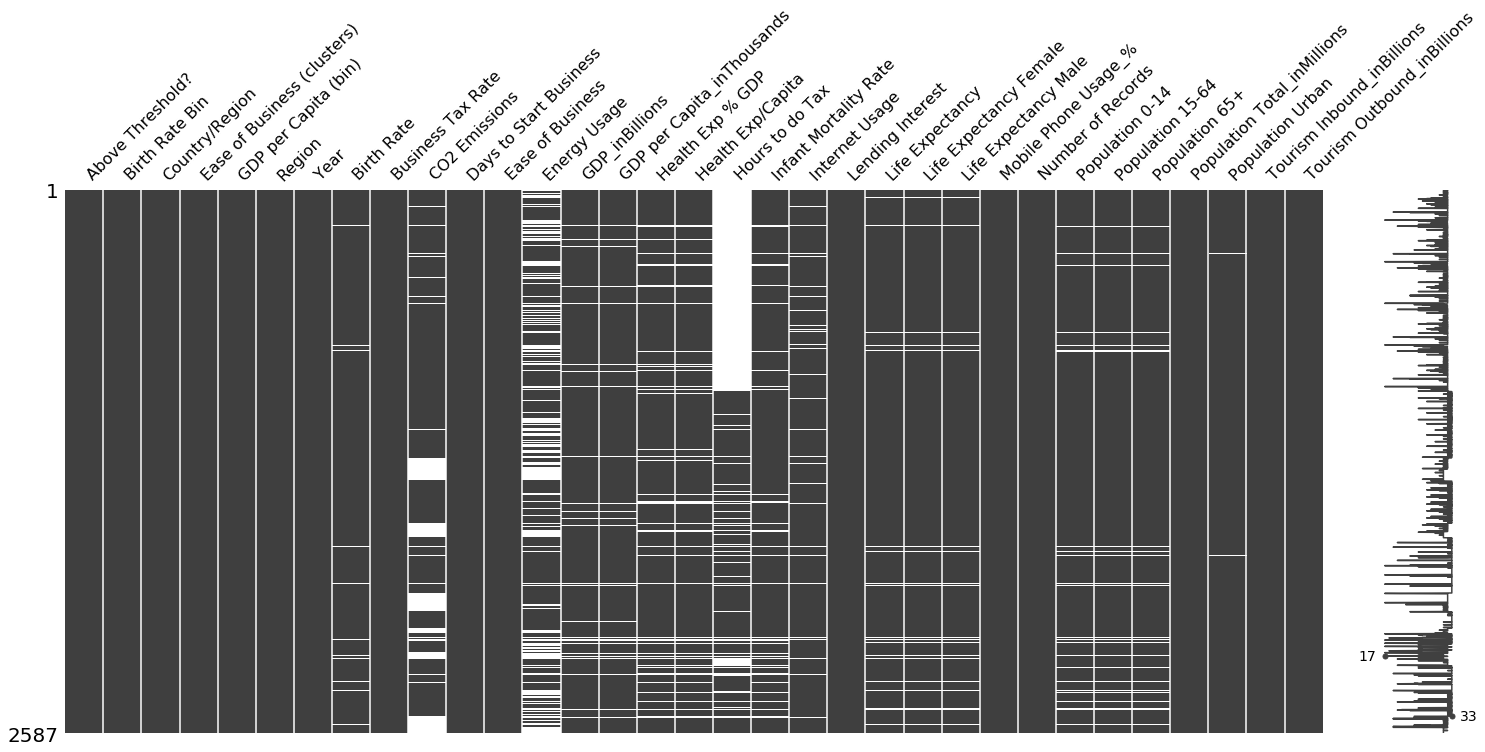

In [28]:
import missingno as msno
print(msno.matrix(df))
df.describe()

AxesSubplot(0.125,0.125;0.698618x0.755)


,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,2531.000000,2587.000000,2.090000e+03,2587.000000,2587.000000,1.782000e+03,2446.000000,2446.000000,2362.000000,2362.000000,1413.000000,2411.000000,2587.000000,2500.000000,2500.00000,2500.000000,2587.00000,2587.0,2471.000000,2471.000000,2471.000000,2587.000000,2587.000000,2587.000000
mean,2.291940,26.904909,1.446837e+05,26.533050,6.756088,7.736674e+04,268.974244,10815.784955,6.444369,765.245131,302.429582,0.033188,0.107002,68.763600,70.85040,66.182000,54.96753,1.0,0.303463,0.623284,0.073250,32.880054,4.413220,3.564747
std,1.136355,38.963001,6.207909e+05,50.389856,28.456661,2.601234e+05,1140.350996,16410.468594,2.638476,1431.343746,273.464866,0.029996,0.160901,9.958202,10.67929,9.352383,47.87943,0.0,0.106697,0.069787,0.049559,126.886212,13.267421,10.325782
min,0.700000,0.000000,7.000000e+00,0.000000,0.000000,8.000000e+00,0.000000,108.000000,0.800000,2.000000,12.000000,0.002000,0.000000,38.000000,39.00000,37.000000,0.00000,1.0,0.118000,0.474000,0.003000,0.100000,0.000000,0.000000
25%,1.300000,0.000000,1.541000e+03,0.000000,0.000000,3.784000e+03,4.000000,951.500000,4.600000,49.250000,156.000000,0.009000,0.000000,63.000000,64.00000,60.000000,9.00000,1.0,0.204000,0.559000,0.033000,1.300000,0.000000,0.000000
50%,2.100000,22.000000,9.068500e+03,13.000000,0.000000,1.439800e+04,16.000000,3540.000000,6.100000,190.000000,240.000000,0.021000,0.089000,72.000000,75.00000,68.000000,47.00000,1.0,0.300000,0.642000,0.052000,6.500000,0.000000,0.000000
75%,3.100000,43.000000,6.112450e+04,35.000000,0.000000,4.199600e+04,114.750000,13386.250000,7.900000,637.250000,347.000000,0.054000,0.151000,76.000000,79.00000,73.000000,92.00000,1.0,0.403000,0.676000,0.112000,21.200000,3.000000,2.000000
max,5.300000,339.000000,8.286892e+06,694.000000,189.000000,2.727728e+06,16200.000000,112029.000000,22.500000,9908.000000,2600.000000,0.141000,4.965000,86.000000,87.00000,88.000000,290.00000,1.0,0.500000,0.858000,0.244000,1350.700000,200.000000,97.000000


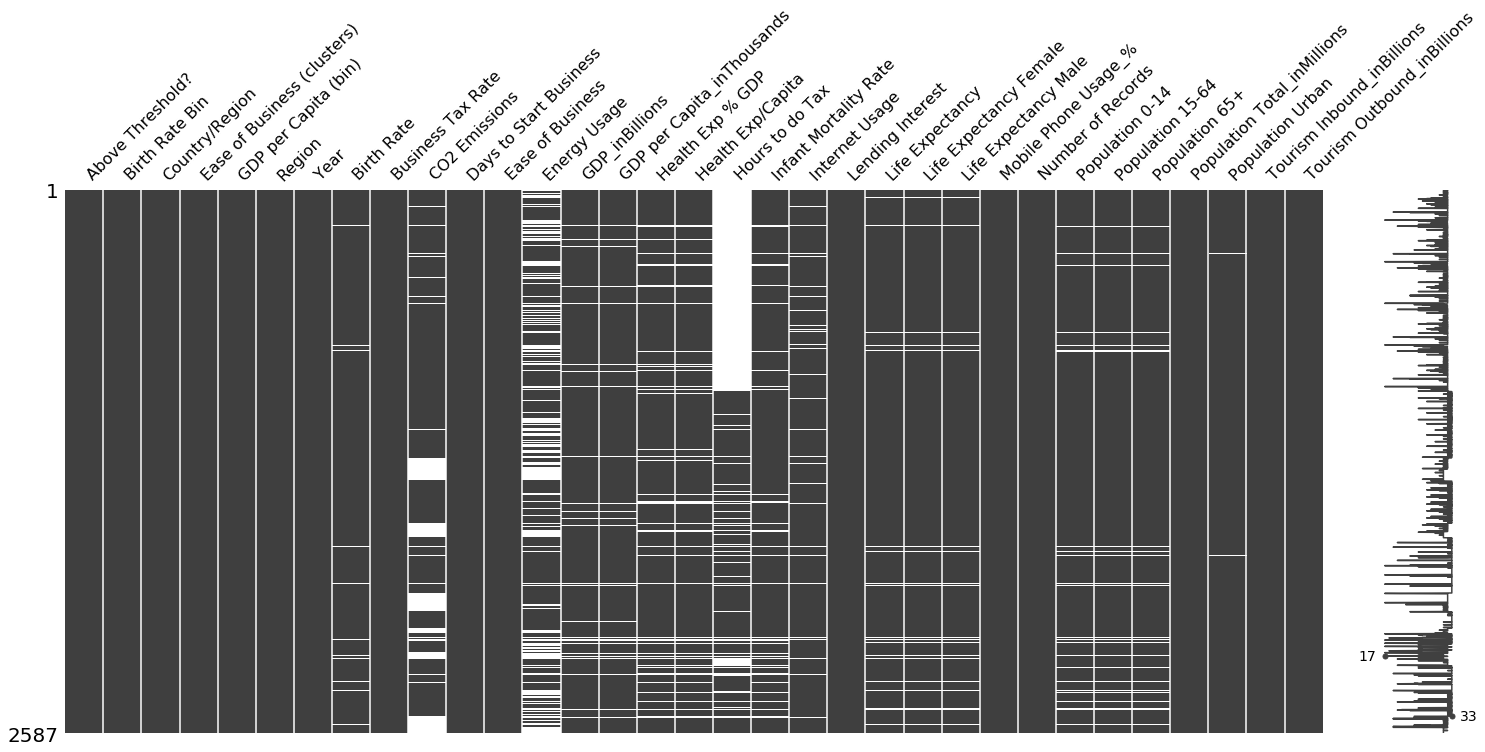

In [29]:
print(msno.matrix(df))
df.describe()

In [30]:
df_null = df[df['Life Expectancy'].isnull()]
df_null['Region'].unique()

array(['Africa', 'Europe', 'Oceania', 'The Americas'], dtype=object)

In [31]:
df_null = df[df['Country/Region'] != 'Myanmar']
df_null['Country/Region'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo (Kinshasa)', 'Congo (Brazzaville)',
       "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland',
       'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe',
       'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan',
       'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong SAR', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'North Korea', 'South Korea',
       'Kyrgyzstan', 'Laos', 'Mac

In [32]:
df = df[df['Country/Region'].isin(['Brunei', 'Cambodia', 'Indonesia', 'Laos','Malaysia', 
                                 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste',
                                 'Vietnam'])]
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
58,Below Threshold,1.5-3%,Brunei,Friendly,14064,Asia,2000-01-12,2.3,0.0,6527.0,0,0.0,2385.0,6.0,18087.0,3.0,543.0,NaN,0.008,9%,0.055,76.0,78.0,74.0,29.0,1,0.304,0.668,0.028,0.3,71.20%,0,0
59,Below Threshold,1.5-3%,Cambodia,Moderate,0,Asia,2000-01-12,2.8,0.0,1977.0,0,0.0,3412.0,4.0,299.0,6.3,19.0,NaN,0.082,0%,0.000,62.0,65.0,59.0,1.0,1,0.408,0.554,0.038,12.2,18.60%,0,0
64,Below Threshold,1.5-3%,Indonesia,Moderate,0,Asia,2000-01-12,2.2,0.0,263419.0,0,0.0,154768.0,165.0,790.0,2.0,15.0,NaN,0.041,1%,0.185,67.0,69.0,65.0,2.0,1,0.307,0.647,0.047,208.9,42.00%,5,3
70,Below Threshold,Above 3%,Laos,Low,0,Asia,2000-01-12,3.1,0.0,972.0,0,0.0,NaN,2.0,321.0,3.3,11.0,NaN,0.083,0%,0.320,62.0,63.0,60.0,0.0,1,0.435,0.529,0.036,5.4,22.00%,0,0
72,Below Threshold,1.5-3%,Malaysia,Very Friendly,0,Asia,2000-01-12,2.3,0.0,126603.0,0,0.0,47110.0,94.0,4005.0,3.0,120.0,NaN,0.009,21%,0.077,73.0,75.0,71.0,22.0,1,0.333,0.628,0.038,23.4,62.00%,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Below Threshold,1.5-3%,Indonesia,Moderate,0,Asia,2012-01-12,1.9,32.0,NaN,48,116.0,NaN,877.0,3553.0,3.0,108.0,259.0,0.025,15%,0.118,71.0,73.0,69.0,114.0,1,0.293,0.656,0.051,246.9,51.50%,9,9
1688,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2012-01-12,2.5,45.0,NaN,36,133.0,NaN,250.0,2585.0,4.6,119.0,193.0,0.024,36%,0.057,69.0,72.0,65.0,106.0,1,0.345,0.616,0.038,96.7,44.80%,5,7
1690,Below Threshold,1.5-3%,Cambodia,Moderate,0,Asia,2012-01-12,2.6,21.0,NaN,102,135.0,NaN,14.0,945.0,5.4,51.0,173.0,0.034,5%,0.000,72.0,74.0,69.0,129.0,1,0.312,0.635,0.053,14.9,20.10%,2,0
1691,Below Threshold,1.5-3%,Laos,Low,0,Asia,2012-01-12,2.7,32.0,NaN,92,163.0,NaN,9.0,1412.0,2.9,40.0,362.0,0.055,11%,0.000,68.0,69.0,66.0,65.0,1,0.356,0.606,0.038,6.6,35.40%,0,0


AxesSubplot(0.125,0.125;0.698618x0.755)


,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,130.000000,130.000000,108.000000,130.000000,130.000000,100.000000,130.000000,130.000000,130.000000,130.000000,79.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2.187692,19.969231,100569.620370,50.492308,7.061538,54688.290000,122.961538,7848.030769,4.277692,262.253846,330.936709,0.029946,0.093500,71.438462,73.746154,68.615385,56.130769,1.0,0.314938,0.635038,0.050031,51.534615,5.353846,3.400000
std,0.803868,17.714330,119252.666573,50.953581,29.672568,56267.750554,157.163343,12760.534316,1.611983,442.941267,277.903292,0.023813,0.073302,5.431753,5.799374,5.252367,45.243594,0.0,0.085351,0.070079,0.019195,67.547754,7.062140,4.547084
min,0.900000,0.000000,161.000000,0.000000,0.000000,58.000000,0.000000,299.000000,2.000000,11.000000,80.000000,0.002000,0.000000,60.000000,61.000000,58.000000,0.000000,1.0,0.165000,0.475000,0.024000,0.300000,0.000000,0.000000
25%,1.700000,0.000000,3363.000000,0.000000,0.000000,4709.000000,7.000000,746.000000,3.100000,30.750000,144.000000,0.008000,0.054250,68.000000,70.000000,65.000000,12.000000,1.0,0.259000,0.592750,0.036000,4.450000,0.000000,0.000000
50%,2.100000,22.000000,57392.500000,37.000000,0.000000,38761.500000,90.000000,1640.000000,3.900000,63.500000,259.000000,0.025000,0.070500,71.000000,74.500000,68.000000,49.500000,1.0,0.301000,0.651000,0.045000,19.150000,3.000000,2.000000
75%,2.700000,36.750000,172329.250000,93.000000,0.000000,72735.250000,179.000000,6036.250000,5.275000,220.250000,362.000000,0.047250,0.124000,75.000000,79.000000,72.000000,93.750000,1.0,0.370750,0.693750,0.065000,80.875000,8.000000,5.750000
max,4.300000,49.000000,453106.000000,168.000000,167.000000,211296.000000,877.000000,54025.000000,10.600000,2426.000000,1050.000000,0.084000,0.320000,83.000000,85.000000,80.000000,152.000000,1.0,0.500000,0.738000,0.097000,246.900000,38.000000,22.000000


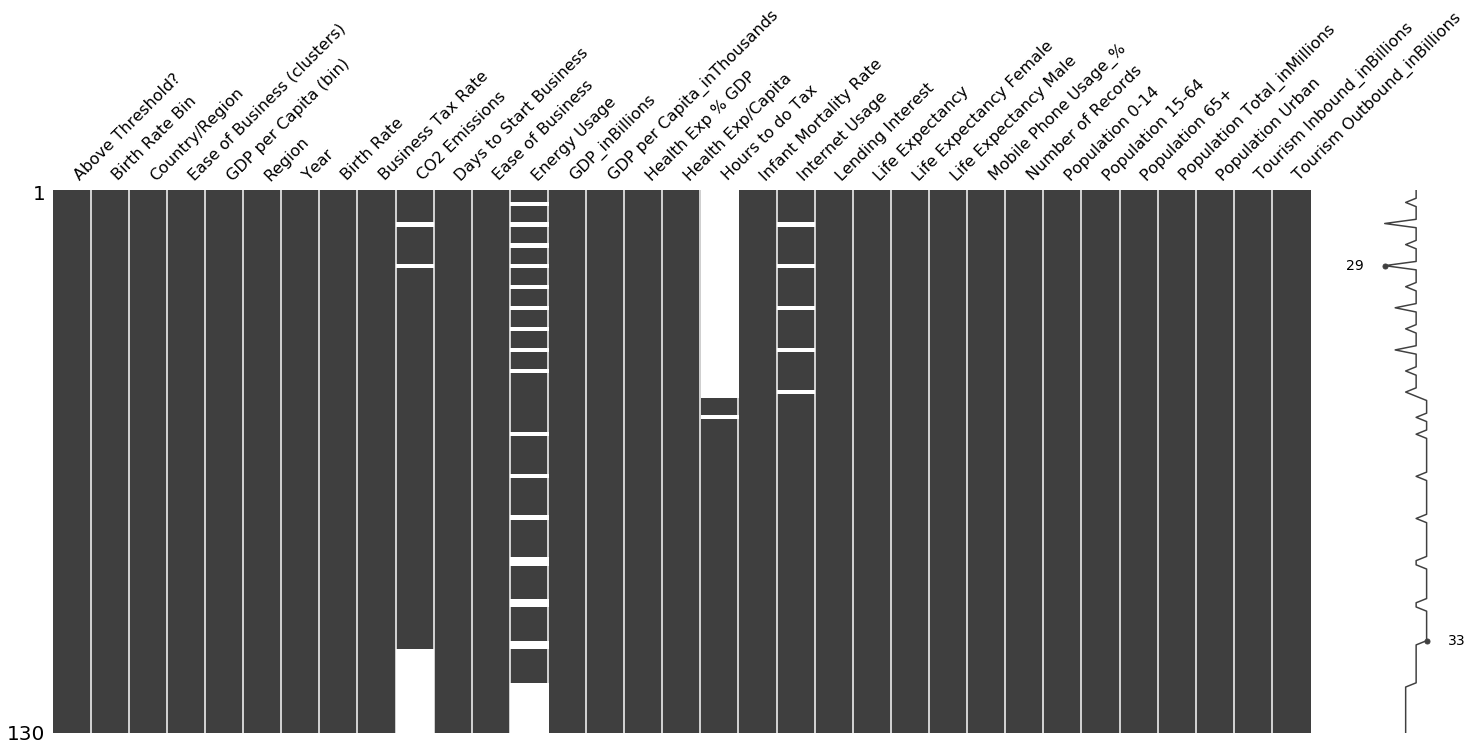

In [33]:
print(msno.matrix(df))
df.describe()

In [34]:
df_null = df[df['Internet Usage'].isnull()]
df_null['Country/Region'].unique()

array(['Timor-Leste'], dtype=object)

In [35]:
#too many missing value
df=df.drop(['CO2 Emissions','Energy Usage', 'Hours to do Tax', 'Birth Rate', 'Internet Usage' ],axis=1)

AxesSubplot(0.125,0.125;0.698618x0.755)


,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,19.969231,50.492308,7.061538,122.961538,7848.030769,4.277692,262.253846,0.029946,0.093500,71.438462,73.746154,68.615385,56.130769,1.0,0.314938,0.635038,0.050031,51.534615,5.353846,3.400000
std,17.714330,50.953581,29.672568,157.163343,12760.534316,1.611983,442.941267,0.023813,0.073302,5.431753,5.799374,5.252367,45.243594,0.0,0.085351,0.070079,0.019195,67.547754,7.062140,4.547084
min,0.000000,0.000000,0.000000,0.000000,299.000000,2.000000,11.000000,0.002000,0.000000,60.000000,61.000000,58.000000,0.000000,1.0,0.165000,0.475000,0.024000,0.300000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000,746.000000,3.100000,30.750000,0.008000,0.054250,68.000000,70.000000,65.000000,12.000000,1.0,0.259000,0.592750,0.036000,4.450000,0.000000,0.000000
50%,22.000000,37.000000,0.000000,90.000000,1640.000000,3.900000,63.500000,0.025000,0.070500,71.000000,74.500000,68.000000,49.500000,1.0,0.301000,0.651000,0.045000,19.150000,3.000000,2.000000
75%,36.750000,93.000000,0.000000,179.000000,6036.250000,5.275000,220.250000,0.047250,0.124000,75.000000,79.000000,72.000000,93.750000,1.0,0.370750,0.693750,0.065000,80.875000,8.000000,5.750000
max,49.000000,168.000000,167.000000,877.000000,54025.000000,10.600000,2426.000000,0.084000,0.320000,83.000000,85.000000,80.000000,152.000000,1.0,0.500000,0.738000,0.097000,246.900000,38.000000,22.000000


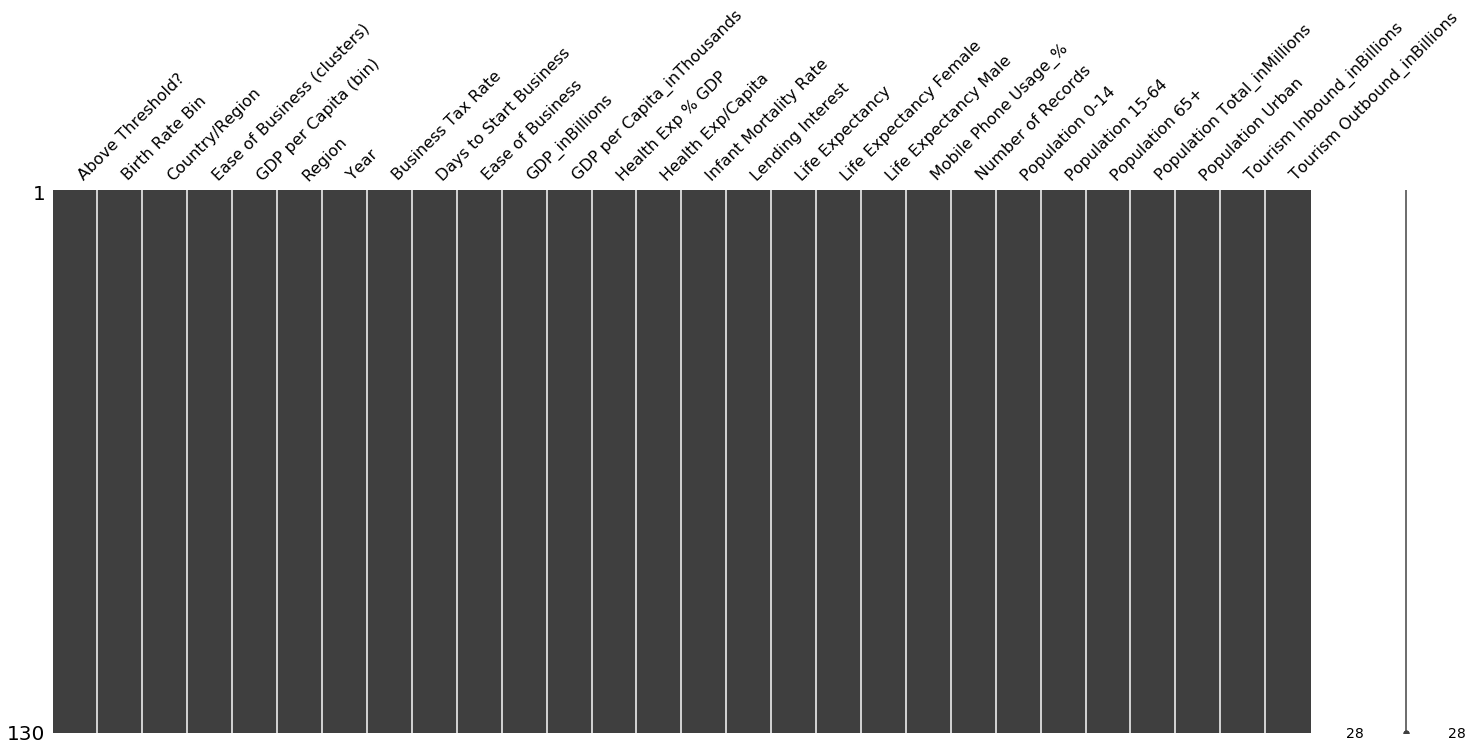

In [36]:
print(msno.matrix(df))
df.describe()

In [37]:
df.describe()

,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Tourism Inbound_inBillions,Tourism Outbound_inBillions
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,19.969231,50.492308,7.061538,122.961538,7848.030769,4.277692,262.253846,0.029946,0.093500,71.438462,73.746154,68.615385,56.130769,1.0,0.314938,0.635038,0.050031,51.534615,5.353846,3.400000
std,17.714330,50.953581,29.672568,157.163343,12760.534316,1.611983,442.941267,0.023813,0.073302,5.431753,5.799374,5.252367,45.243594,0.0,0.085351,0.070079,0.019195,67.547754,7.062140,4.547084
min,0.000000,0.000000,0.000000,0.000000,299.000000,2.000000,11.000000,0.002000,0.000000,60.000000,61.000000,58.000000,0.000000,1.0,0.165000,0.475000,0.024000,0.300000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.000000,746.000000,3.100000,30.750000,0.008000,0.054250,68.000000,70.000000,65.000000,12.000000,1.0,0.259000,0.592750,0.036000,4.450000,0.000000,0.000000
50%,22.000000,37.000000,0.000000,90.000000,1640.000000,3.900000,63.500000,0.025000,0.070500,71.000000,74.500000,68.000000,49.500000,1.0,0.301000,0.651000,0.045000,19.150000,3.000000,2.000000
75%,36.750000,93.000000,0.000000,179.000000,6036.250000,5.275000,220.250000,0.047250,0.124000,75.000000,79.000000,72.000000,93.750000,1.0,0.370750,0.693750,0.065000,80.875000,8.000000,5.750000
max,49.000000,168.000000,167.000000,877.000000,54025.000000,10.600000,2426.000000,0.084000,0.320000,83.000000,85.000000,80.000000,152.000000,1.0,0.500000,0.738000,0.097000,246.900000,38.000000,22.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 58 to 1695
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Above Threshold?             130 non-null    object        
 1   Birth Rate Bin               130 non-null    object        
 2   Country/Region               130 non-null    object        
 3   Ease of Business (clusters)  130 non-null    object        
 4   GDP per Capita (bin)         130 non-null    object        
 5   Region                       130 non-null    object        
 6   Year                         130 non-null    datetime64[ns]
 7   Business Tax Rate            130 non-null    float64       
 8   Days to Start Business       130 non-null    int64         
 9   Ease of Business             130 non-null    float64       
 10  GDP_inBillions               130 non-null    float64       
 11  GDP per Capita_inThousands   130 non-null  

In [39]:
df['Population Urban'] = df['Population Urban'].str.rstrip('%')
df['Population Urban'] = df['Population Urban'].astype(float)

In [40]:
numcol=['Tourism Outbound_inBillions', 'Tourism Inbound_inBillions']
for column in numcol:
    if df[column].quantile(.9973)<df[column].max():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Max',df[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

Tourism Outbound_inBillions
99th Percentile 21.651699999999977
Max 22
Outliers Present in Column Tourism Outbound_inBillions

Tourism Inbound_inBillions
99th Percentile 35.56189999999984
Max 38
Outliers Present in Column Tourism Inbound_inBillions



In [41]:
##### Finding with Outliers 
numcol=['Year',
       'Business Tax Rate', 'Days to Start Business', 'Ease of Business',
       'GDP_inBillions', 'GDP per Capita_inThousands', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Lending Interest',
       'Life Expectancy', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage_%', 'Number of Records', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total_inMillions',
       'Population Urban']
for column in numcol:
    if df[column].quantile(.9973)<df[column].max():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Max',df[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif df[column].quantile(0)>df[column].min():
        print(column)
        print('99th Percentile',df[column].quantile(.9973))
        print('Min',df[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

Business Tax Rate
99th Percentile 48.65169999999998
Max 49.0
Outliers Present in Column Business Tax Rate

Days to Start Business
99th Percentile 167.65169999999998
Max 168
Outliers Present in Column Days to Start Business

Ease of Business
99th Percentile 165.6067999999999
Max 167.0
Outliers Present in Column Ease of Business

GDP_inBillions
99th Percentile 866.2026999999993
Max 877.0
Outliers Present in Column GDP_inBillions

GDP per Capita_inThousands
99th Percentile 53618.53389999997
Max 54025.0
Outliers Present in Column GDP per Capita_inThousands

Health Exp % GDP
99th Percentile 9.903399999999953
Max 10.6
Outliers Present in Column Health Exp % GDP

Health Exp/Capita
99th Percentile 2327.7793999999935
Max 2426.0
Outliers Present in Column Health Exp/Capita

Infant Mortality Rate
99th Percentile 0.08365169999999998
Max 0.084
Outliers Present in Column Infant Mortality Rate

Lending Interest
99th Percentile 0.31477549999999965
Max 0.32
Outliers Present in Column Lending Interest



In [42]:
df_outlier_max = df[df['Business Tax Rate'] == 49.0]
df_outlier_max

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
1518,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2007-01-12,49.0,47,0.0,149.0,1677.0,3.9,65.0,0.027,0.087,68.0,71.0,64.0,65.0,1,0.364,0.601,0.035,88.9,46.1,6,2


In [43]:
df_outlier_max_country = df[df['Country/Region'] == 'Philippines']
df_outlier_max_country

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
78,Below Threshold,Above 3%,Philippines,Moderate,0,Asia,2000-01-12,0.0,0,0.0,81.0,1043.0,3.2,33.0,0.030,0.109,67.0,70.0,64.0,8.0,1,0.385,0.583,0.032,77.7,48.0,2,2
285,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2001-01-12,0.0,0,0.0,76.0,962.0,3.0,29.0,0.030,0.124,67.0,70.0,64.0,15.0,1,0.382,0.585,0.033,79.3,47.7,2,2
492,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2002-01-12,0.0,0,0.0,81.0,1005.0,2.8,28.0,0.029,0.091,67.0,70.0,64.0,19.0,1,0.380,0.587,0.033,81.0,47.4,2,2
699,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2003-01-12,0.0,49,0.0,84.0,1016.0,3.2,33.0,0.029,0.095,68.0,71.0,64.0,27.0,1,0.377,0.590,0.033,82.6,47.1,2,2
906,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2004-01-12,0.0,49,0.0,91.0,1085.0,3.2,35.0,0.028,0.101,68.0,71.0,64.0,39.0,1,0.374,0.592,0.034,84.2,46.9,2,2
1451,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2005-01-12,47.0,47,0.0,103.0,1200.0,3.9,47.0,0.028,0.102,68.0,71.0,64.0,41.0,1,0.371,0.595,0.034,85.8,46.6,3,2
1486,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2006-01-12,48.0,47,0.0,122.0,1396.0,4.0,55.0,0.027,0.098,68.0,71.0,64.0,49.0,1,0.367,0.598,0.035,87.4,46.3,4,2
1518,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2007-01-12,49.0,47,0.0,149.0,1677.0,3.9,65.0,0.027,0.087,68.0,71.0,64.0,65.0,1,0.364,0.601,0.035,88.9,46.1,6,2
1553,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2008-01-12,47.0,41,0.0,174.0,1925.0,3.8,74.0,0.026,0.088,68.0,71.0,65.0,75.0,1,0.360,0.604,0.036,90.4,45.8,3,3
1586,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2009-01-12,47.0,42,0.0,168.0,1828.0,4.3,78.0,0.026,0.086,69.0,72.0,65.0,82.0,1,0.357,0.607,0.037,91.9,45.5,3,3


# 2. Hypothesis Testing / Significant Test, Modelling & Testing

In [44]:
columns=['Year',
       'Business Tax Rate', 'Days to Start Business', 'Ease of Business',
       'GDP_inBillions', 'GDP per Capita_inThousands', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Lending Interest',
       'Life Expectancy', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage_%', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total_inMillions',
       'Population Urban', 'Tourism Outbound_inBillions', 'Tourism Inbound_inBillions']

In [45]:
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
58,Below Threshold,1.5-3%,Brunei,Friendly,14064,Asia,2000-01-12,0.0,0,0.0,6.0,18087.0,3.0,543.0,0.008,0.055,76.0,78.0,74.0,29.0,1,0.304,0.668,0.028,0.3,71.2,0,0
59,Below Threshold,1.5-3%,Cambodia,Moderate,0,Asia,2000-01-12,0.0,0,0.0,4.0,299.0,6.3,19.0,0.082,0.000,62.0,65.0,59.0,1.0,1,0.408,0.554,0.038,12.2,18.6,0,0
64,Below Threshold,1.5-3%,Indonesia,Moderate,0,Asia,2000-01-12,0.0,0,0.0,165.0,790.0,2.0,15.0,0.041,0.185,67.0,69.0,65.0,2.0,1,0.307,0.647,0.047,208.9,42.0,5,3
70,Below Threshold,Above 3%,Laos,Low,0,Asia,2000-01-12,0.0,0,0.0,2.0,321.0,3.3,11.0,0.083,0.320,62.0,63.0,60.0,0.0,1,0.435,0.529,0.036,5.4,22.0,0,0
72,Below Threshold,1.5-3%,Malaysia,Very Friendly,0,Asia,2000-01-12,0.0,0,0.0,94.0,4005.0,3.0,120.0,0.009,0.077,73.0,75.0,71.0,22.0,1,0.333,0.628,0.038,23.4,62.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Below Threshold,1.5-3%,Indonesia,Moderate,0,Asia,2012-01-12,32.0,48,116.0,877.0,3553.0,3.0,108.0,0.025,0.118,71.0,73.0,69.0,114.0,1,0.293,0.656,0.051,246.9,51.5,9,9
1688,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2012-01-12,45.0,36,133.0,250.0,2585.0,4.6,119.0,0.024,0.057,69.0,72.0,65.0,106.0,1,0.345,0.616,0.038,96.7,44.8,5,7
1690,Below Threshold,1.5-3%,Cambodia,Moderate,0,Asia,2012-01-12,21.0,102,135.0,14.0,945.0,5.4,51.0,0.034,0.000,72.0,74.0,69.0,129.0,1,0.312,0.635,0.053,14.9,20.1,2,0
1691,Below Threshold,1.5-3%,Laos,Low,0,Asia,2012-01-12,32.0,92,163.0,9.0,1412.0,2.9,40.0,0.055,0.000,68.0,69.0,66.0,65.0,1,0.356,0.606,0.038,6.6,35.4,0,0


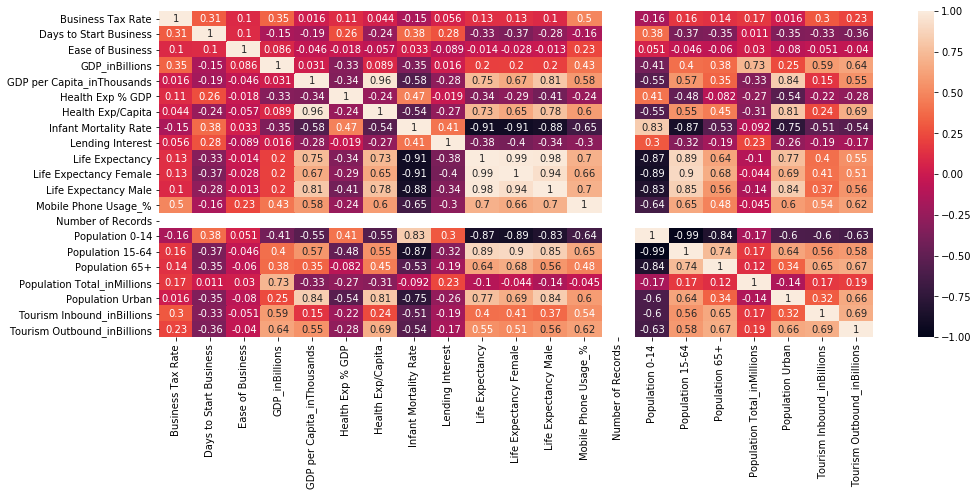

In [46]:
df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

## 2.1 ARIMA

In [47]:
df

,Above Threshold?,Birth Rate Bin,Country/Region,Ease of Business (clusters),GDP per Capita (bin),Region,Year,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban,Tourism Inbound_inBillions,Tourism Outbound_inBillions
58,Below Threshold,1.5-3%,Brunei,Friendly,14064,Asia,2000-01-12,0.0,0,0.0,6.0,18087.0,3.0,543.0,0.008,0.055,76.0,78.0,74.0,29.0,1,0.304,0.668,0.028,0.3,71.2,0,0
59,Below Threshold,1.5-3%,Cambodia,Moderate,0,Asia,2000-01-12,0.0,0,0.0,4.0,299.0,6.3,19.0,0.082,0.000,62.0,65.0,59.0,1.0,1,0.408,0.554,0.038,12.2,18.6,0,0
64,Below Threshold,1.5-3%,Indonesia,Moderate,0,Asia,2000-01-12,0.0,0,0.0,165.0,790.0,2.0,15.0,0.041,0.185,67.0,69.0,65.0,2.0,1,0.307,0.647,0.047,208.9,42.0,5,3
70,Below Threshold,Above 3%,Laos,Low,0,Asia,2000-01-12,0.0,0,0.0,2.0,321.0,3.3,11.0,0.083,0.320,62.0,63.0,60.0,0.0,1,0.435,0.529,0.036,5.4,22.0,0,0
72,Below Threshold,1.5-3%,Malaysia,Very Friendly,0,Asia,2000-01-12,0.0,0,0.0,94.0,4005.0,3.0,120.0,0.009,0.077,73.0,75.0,71.0,22.0,1,0.333,0.628,0.038,23.4,62.0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Below Threshold,1.5-3%,Indonesia,Moderate,0,Asia,2012-01-12,32.0,48,116.0,877.0,3553.0,3.0,108.0,0.025,0.118,71.0,73.0,69.0,114.0,1,0.293,0.656,0.051,246.9,51.5,9,9
1688,Below Threshold,1.5-3%,Philippines,Moderate,0,Asia,2012-01-12,45.0,36,133.0,250.0,2585.0,4.6,119.0,0.024,0.057,69.0,72.0,65.0,106.0,1,0.345,0.616,0.038,96.7,44.8,5,7
1690,Below Threshold,1.5-3%,Cambodia,Moderate,0,Asia,2012-01-12,21.0,102,135.0,14.0,945.0,5.4,51.0,0.034,0.000,72.0,74.0,69.0,129.0,1,0.312,0.635,0.053,14.9,20.1,2,0
1691,Below Threshold,1.5-3%,Laos,Low,0,Asia,2012-01-12,32.0,92,163.0,9.0,1412.0,2.9,40.0,0.055,0.000,68.0,69.0,66.0,65.0,1,0.356,0.606,0.038,6.6,35.4,0,0


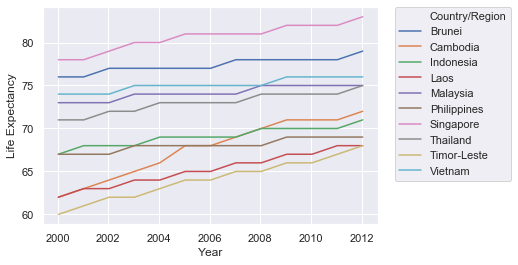

In [48]:
sns.set(style="darkgrid")
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue="Country/Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [49]:
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [50]:
df.set_index('Year',inplace=True)

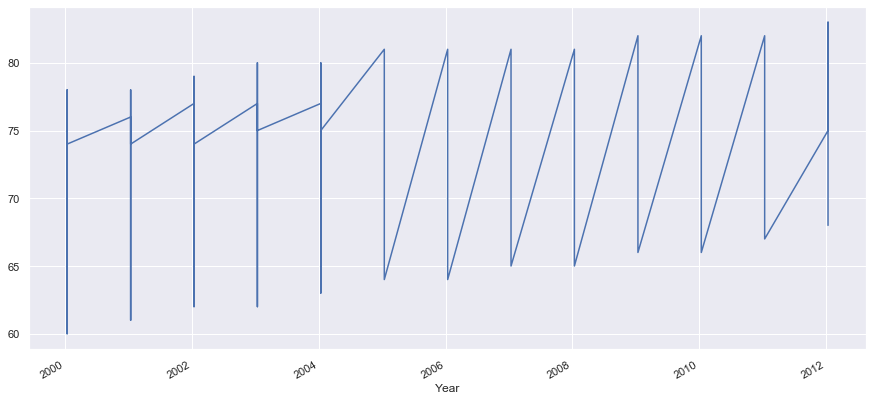

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['Life Expectancy'].plot()

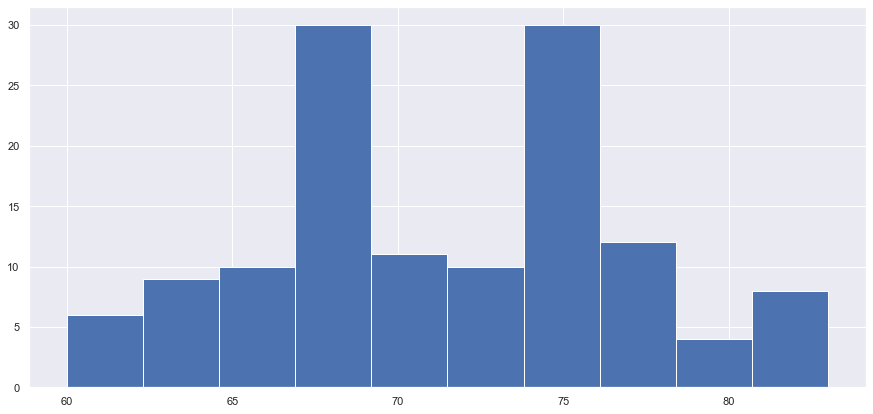

In [52]:
df['Life Expectancy'].hist()

In [53]:
#Ho: It is non-stationary
#HA: It is stationary

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
def adfuller_test(column):
    result = adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary, accept H0 ")

adfuller_test(df['Life Expectancy'])

ADF Test Statistic : -1.460513789757045
p-value : 0.5529464025706526
#Lags Used : 13
Number of Observations : 116
weak evidence against null hypothesis,indicating it is non-stationary, accept H0 


In [56]:
#Ho: There is no relationship
#H1:  There is relationship

In [57]:
from scipy.stats import chi2_contingency

In [58]:
columns=['Country/Region',
       'Business Tax Rate', 'Days to Start Business', 'Ease of Business',
       'GDP_inBillions', 'GDP per Capita_inThousands', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Lending Interest',
       'Life Expectancy', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage_%', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total_inMillions',
       'Population Urban']
#remove 'Tourism Outbound_inBillions', 'Tourism Inbound_inBillions' in this scope
df = df[columns]
df

,Country/Region,Business Tax Rate,Days to Start Business,Ease of Business,GDP_inBillions,GDP per Capita_inThousands,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage_%,Population 0-14,Population 15-64,Population 65+,Population Total_inMillions,Population Urban
Year,,,,,,,,,,,,,,,,,,,
2000-01-12,Brunei,0.0,0,0.0,6.0,18087.0,3.0,543.0,0.008,0.055,76.0,78.0,74.0,29.0,0.304,0.668,0.028,0.3,71.2
2000-01-12,Cambodia,0.0,0,0.0,4.0,299.0,6.3,19.0,0.082,0.000,62.0,65.0,59.0,1.0,0.408,0.554,0.038,12.2,18.6
2000-01-12,Indonesia,0.0,0,0.0,165.0,790.0,2.0,15.0,0.041,0.185,67.0,69.0,65.0,2.0,0.307,0.647,0.047,208.9,42.0
2000-01-12,Laos,0.0,0,0.0,2.0,321.0,3.3,11.0,0.083,0.320,62.0,63.0,60.0,0.0,0.435,0.529,0.036,5.4,22.0
2000-01-12,Malaysia,0.0,0,0.0,94.0,4005.0,3.0,120.0,0.009,0.077,73.0,75.0,71.0,22.0,0.333,0.628,0.038,23.4,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-12,Indonesia,32.0,48,116.0,877.0,3553.0,3.0,108.0,0.025,0.118,71.0,73.0,69.0,114.0,0.293,0.656,0.051,246.9,51.5
2012-01-12,Philippines,45.0,36,133.0,250.0,2585.0,4.6,119.0,0.024,0.057,69.0,72.0,65.0,106.0,0.345,0.616,0.038,96.7,44.8
2012-01-12,Cambodia,21.0,102,135.0,14.0,945.0,5.4,51.0,0.034,0.000,72.0,74.0,69.0,129.0,0.312,0.635,0.053,14.9,20.1


In [59]:
corr_matrix = df.corr()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack().sort_values(kind="quicksort",ascending=False))

print('Top 10 Correlated Features Pairs:')
print(sol[0:10],'\n')
print('Bottom 10 Correlated Features Pairs:')
print(sol[143:153])

Top 10 Correlated Features Pairs:
Life Expectancy             Life Expectancy Female    0.985203
                            Life Expectancy Male      0.980874
GDP per Capita_inThousands  Health Exp/Capita         0.961569
Life Expectancy Female      Life Expectancy Male      0.937118
                            Population 15-64          0.902068
Life Expectancy             Population 15-64          0.888006
Life Expectancy Male        Population 15-64          0.853849
GDP per Capita_inThousands  Population Urban          0.842592
Life Expectancy Male        Population Urban          0.835824
Infant Mortality Rate       Population 0-14           0.832094
dtype: float64 

Bottom 10 Correlated Features Pairs:
Infant Mortality Rate   Population Urban         -0.753522
Life Expectancy Male    Population 0-14          -0.828375
Population 0-14         Population 65+           -0.835752
Infant Mortality Rate   Population 15-64         -0.867210
Life Expectancy         Population 0-14       

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
# create dataset
X = df.drop(['Country/Region', 'Population 0-14','Population 15-64', 
            'Population 65+','Population Total_inMillions', 
            'Life Expectancy Female', 'Life Expectancy Male', 
             'Life Expectancy'],
             axis=1)
y = df['Life Expectancy']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(104, 11) (26, 11) (104,) (26,)


In [64]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

75.96074320265939
[-2.41401671e-02 -1.39839688e-03 -2.34525205e-03 -2.02171014e-03
  1.73553687e-04  4.89853399e-01  5.19431085e-04 -2.07519377e+02
  8.46018042e+00  1.54741981e-02 -5.85084973e-02]


In [79]:
list(zip(X.columns, regressor.coef_))

[('Business Tax Rate', -0.024140167066895833),
 ('Days to Start Business', -0.0013983968820038412),
 ('Ease of Business', -0.0023452520486751107),
 ('GDP_inBillions', -0.002021710141101766),
 ('GDP per Capita_inThousands', 0.00017355368732592747),
 ('Health Exp % GDP', 0.48985339923584703),
 ('Health Exp/Capita', 0.0005194310852938431),
 ('Infant Mortality Rate', -207.5193771277484),
 ('Lending Interest', 8.460180415764961),
 ('Mobile Phone Usage_%', 0.015474198051048722),
 ('Population Urban', -0.05850849729661073)]

In [81]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Year,,
2011-01-12,76.0,75.986432
2002-01-12,77.0,75.935440
2009-01-12,74.0,74.132893
2004-01-12,69.0,68.128787
2011-01-12,67.0,67.667968
2001-01-12,63.0,62.312705
2004-01-12,66.0,66.544873
2006-01-12,65.0,64.181133
2001-01-12,63.0,62.220867


In [86]:
from statsmodels.api import OLS
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              616.3
Date:                Wed, 12 May 2021   Prob (F-statistic):                    2.57e-99
Time:                        01:47:05   Log-Likelihood:                         -475.89
No. Observations:                 130   AIC:                                      973.8
Df Residuals:                     119   BIC:                                      1005.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Business Tax Rate             -0.0504      0.072     -0.703      0.483      -0.192       0.092
Days to Start Business        -0.0014      0.022     -0.063      0.950      -0.046       0.043
Ease of Business               0.0146      0.033      0.448      0.655      -0.050       0.079
GDP_inBillions                 0.0116      0.007      1.584      0.116      -0.003       0.026
GDP per Capita_inThousands     0.0006      0.000      1.746      0.083   -7.74e-05       0.001
Health Exp % GDP               6.0648      0.607      9.984      0.000       4.862       7.268
Health Exp/Capita             -0.0327      0.008     -3.967      0.000      -0.049      -0.016
Infant Mortality Rate        175.2821     59.895      2.926      0.004      56.684     293.880
Lending Interest              27.1553     14.251      1.906      0.059      -1.062      55.373
Mobile Phone Usage_%           0.0846      0.038      2.229      0.028       0.009       0.160
Population Urban               0.7436      0.059     12.605      0.000       0.627       0.860
==============================================================================
Omnibus:                        5.836   Durbin-Watson:                   2.493
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.516
Skew:                          -0.395   Prob(JB):                       0.0634
Kurtosis:                       3.628   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
regressor.coef_

array([-2.41401671e-02, -1.39839688e-03, -2.34525205e-03, -2.02171014e-03,
        1.73553687e-04,  4.89853399e-01,  5.19431085e-04, -2.07519377e+02,
        8.46018042e+00,  1.54741981e-02, -5.85084973e-02])

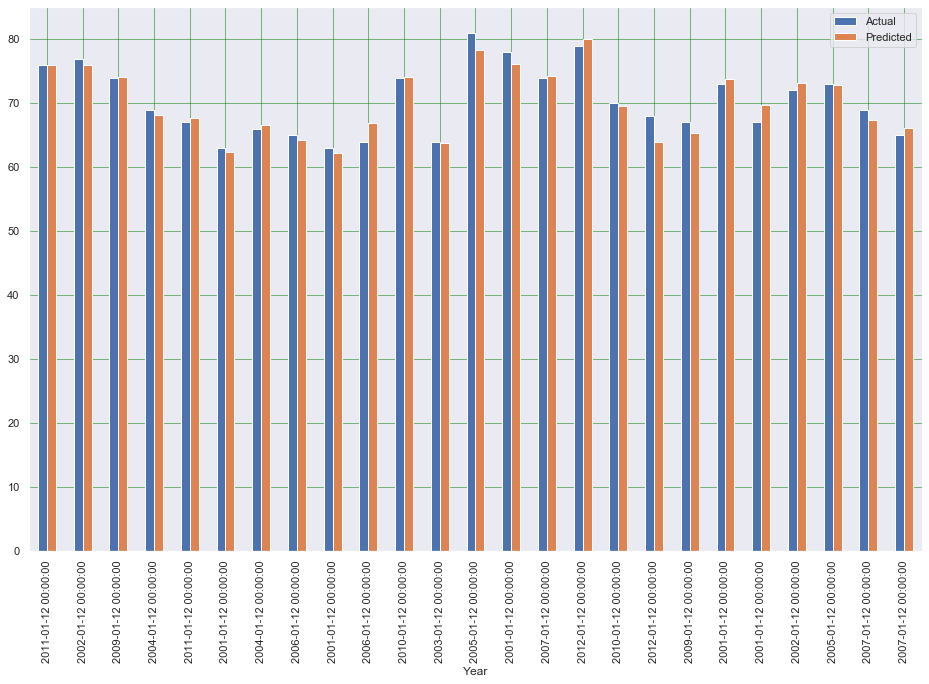

In [68]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [88]:
df.reset_index()

,Year,Actual,Predicted
0,2011-01-12,76.0,75.986432
1,2002-01-12,77.0,75.935440
2,2009-01-12,74.0,74.132893
3,2004-01-12,69.0,68.128787
4,2011-01-12,67.0,67.667968
5,2001-01-12,63.0,62.312705
6,2004-01-12,66.0,66.544873
7,2006-01-12,65.0,64.181133
8,2001-01-12,63.0,62.220867
9,2006-01-12,64.0,66.898399
